In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import yfinance as yf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA





In [2]:
def old_stock_price(stock_symbol,start_date, end_date ): 
    data = yf.download(stock_symbol,start = start_date,end = end_date) 
    return data 

stock_data = old_stock_price("GOOG","2020-01-01","2024-01-01") 
stock_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.077499,68.406998,67.077499,68.368500,68.290787,28132000
2020-01-03,67.392998,68.625000,67.277199,68.032997,67.955666,23728000
2020-01-06,67.500000,69.824997,67.500000,69.710503,69.631264,34646000
2020-01-07,69.897003,70.149498,69.518997,69.667000,69.587814,30054000
2020-01-08,69.603996,70.579002,69.542000,70.216003,70.136192,30560000


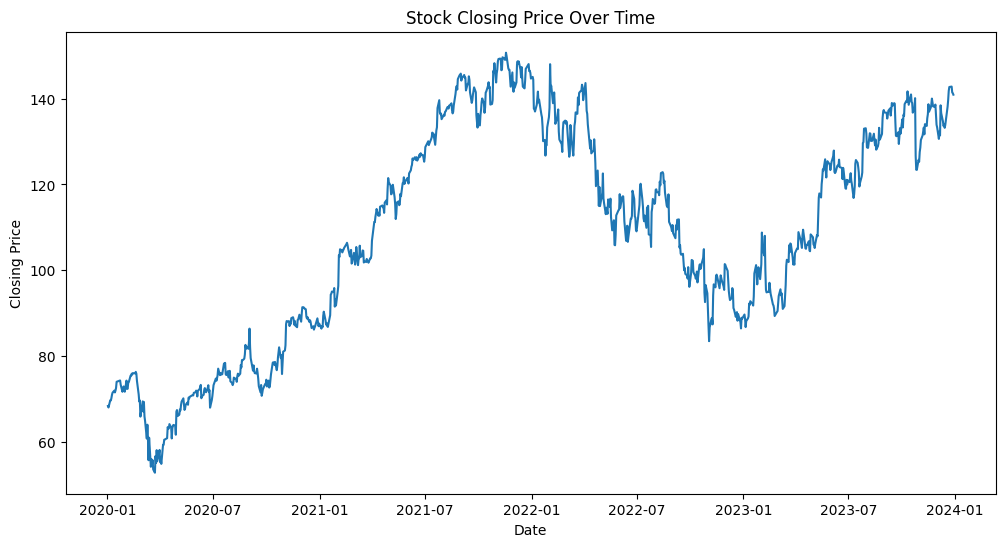

In [3]:
plt.figure(figsize=(12,6))
plt.plot(stock_data["Close"])
plt.title("Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

In [4]:
train_size = int(len(stock_data)*.8)
train_data = stock_data[:train_size]
test_data = stock_data[train_size:]

In [5]:
train_data = train_data["Close"]
test_data = test_data["Close"]

In [6]:
def find_best_arima_order(data,p_values,d_values,q_values):
    best_score,best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                try:
                    model = ARIMA(data, order=(p,d,q))
                    model_fit = model.fit()
                    mse = mean_squared_error(data,model_fit.fittedvalues)
                    if mse < best_score:
                        best_score,best_cfg = mse,(p,d,q)
                except:
                    continue
    return best_cfg            

In [7]:
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)


In [8]:
best_cfg = find_best_arima_order(train_data,p_values,d_values,q_values)
print(f"the best is {best_cfg}.")

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

the best is (2, 0, 2).


In [9]:
model = ARIMA(train_data,order=(best_cfg))
model_fit = model.fit()


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecas

In [10]:
forecasted_values = model_fit.forecast(steps = len(test_data))
mse = mean_squared_error(test_data,forecasted_values)
print("The Mean Square Error is {:.2f}".format(mse))

The Mean Square Error is 1310.81


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
forecasted_values = model_fit.forecast(steps = 180)

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [12]:
forecasted_dates = pd.date_range(start=test_data.index[-1],periods=180,freq='D')

In [13]:
forecast_df = pd.DataFrame({"Date": forecasted_dates,"Forecast": forecasted_values})

In [14]:
forecast_df.head()

,Date,Forecast
804,2023-12-29,91.688803
805,2023-12-30,91.716802
806,2023-12-31,91.735217
807,2024-01-01,91.746867
808,2024-01-02,91.753744


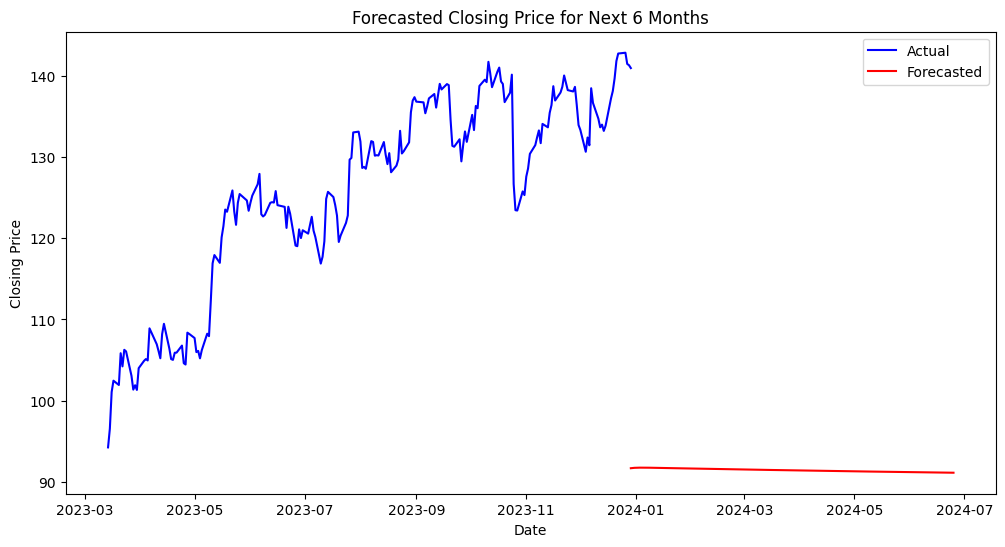

In [15]:
plt.figure(figsize=(12,6))
plt.plot(test_data.index,test_data,label = "Actual",color = "b")
plt.plot(forecast_df["Date"],forecast_df["Forecast"],label = "Forecasted",color = "r")
plt.title("Forecasted Closing Price for Next 6 Months")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()